**project Overview**
This project is divided into 5 parts; they are:
1.Banknote Classification Dataset
2.buildings block of Neural Network 
3.Neural Network Learning(gradient descent algorithm)
4.Final Model and Make Predictions
5.Model performance Analysis with different learning parameters

















**Packages**
let's import all the packages that  will need during this project.

In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **1.Banknote Classification Dataset**

**dataset:**
The dataset contains 1,372 rows with 5 numeric variables. It is a classification problem with two classes (binary classification).

In [ ]:

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
dataset=pd.read_csv(url,header=None)

In [ ]:
#check first five data
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
#describe the data
dataset.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


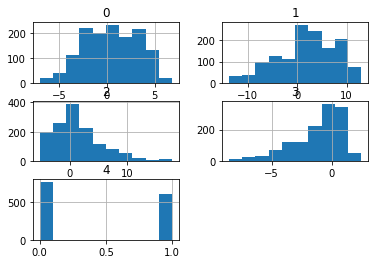

In [ ]:
#plotting histogram of all four feature and lavel colomn
dataset.hist()
plt.show()

In [ ]:
#split the dataset into input and output variables
X, Y = dataset.values[:, :-1], dataset.values[:, -1]

In [ ]:
print(X.shape)
print(Y.shape)

(1372, 4)
(1372,)


for now we  confirmed that the dataset has 5 variables (4 input and one output) and that the dataset has 1,372 rows of data.

In [ ]:
# split into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# **2.buildings block of Neural Network** 

In [ ]:
#sigmoid function as activation function of neuron
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [ ]:

def initialize_parameter(dim):
    w=np.zeros((dim,1))
    b=0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w, b

In [ ]:
#finding gradiend and cost function
def propagate(w, b, X, Y):
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A=sigmoid(np.dot(w.T,X)+b)
    cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw=(1/m)*(np.dot(X,(A-Y).T))
    db=(1/m)*(np.sum(A-Y))
    assert(dw.shape==dw.shape)
    cost = np.squeeze(np.array(cost))
    assert(cost.shape==())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# **3.Neural Network Learning(gradient descent algorithm) **

In [ ]:
#  optimization
#default no. of iteration 100
#default learning_rate=.009
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads,cost=propagate(w,b,X,Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# **4.Final Model and Make Predictions**

In [ ]:
# make prediction

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

In [ ]:
# final model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    dim=X_train.shape[0]
    w,b=initialize_parameter(dim)
    params,grads,costs=optimize(w,b,X_train,Y_train,num_iterations, learning_rate, print_cost)
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w,b,X_test)
    
    Y_prediction_train=predict(w,b,X_train)
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression_model = model(X_train.T, Y_train.T, X_test.T, Y_test.T, num_iterations=10000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.349291
Cost after iteration 200: 0.269321
Cost after iteration 300: 0.229670
Cost after iteration 400: 0.205188
Cost after iteration 500: 0.188111
Cost after iteration 600: 0.175262
Cost after iteration 700: 0.165090
Cost after iteration 800: 0.156739
Cost after iteration 900: 0.149696
Cost after iteration 1000: 0.143632
Cost after iteration 1100: 0.138325
Cost after iteration 1200: 0.133619
Cost after iteration 1300: 0.129401
Cost after iteration 1400: 0.125586
Cost after iteration 1500: 0.122109
Cost after iteration 1600: 0.118920
Cost after iteration 1700: 0.115978
Cost after iteration 1800: 0.113251
Cost after iteration 1900: 0.110712
Cost after iteration 2000: 0.108340
Cost after iteration 2100: 0.106117
Cost after iteration 2200: 0.104025
Cost after iteration 2300: 0.102054
Cost after iteration 2400: 0.100190
Cost after iteration 2500: 0.098425
Cost after iteration 2600: 0.096749
Cost after iteration 2700: 0.095155
Cost

# **5.Model performance Analysis with different learning parameters**

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



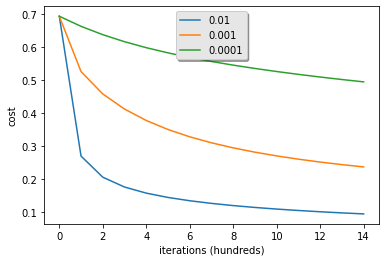

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(X_train.T, Y_train.T, X_test.T, Y_test.T, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()